# import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import quandl
import statsmodels.api as sm
import warnings

warnings.filterwarnings("ignore")

plt.style.use('fivethirtyeight')

# path to string

In [2]:
path = 'C:/Users/leevg/OneDrive/Desktop/CF/DI/A6'

# import data

In [3]:
df = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'TSA Claims Task 6.6.csv'))

In [4]:
df.head()

,Unnamed: 0,Date Received,Incident Date,State,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Category
0,0,2002-06-20,2002-05-09,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full,Medium Price
1,1,2002-06-20,2002-06-16,Arizona,Phoenix Sky Harbor International,Other,Property Damage,Checkpoint,Computers,2270.09,Canceled,0.0,Cancel,Low price
2,2,2002-06-25,2002-05-04,Georgia,Hartsfield-Jackson Atlanta International Airport,Other,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny,Low price
3,3,2002-07-08,2002-06-12,Maryland,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Checkpoint,Glasses & Contacts,16.71,Approved,17.0,Approve in Full,Low price
4,4,2002-07-08,2002-06-04,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Other,Clothing,450.00,Canceled,0.0,Cancel,Low price


In [5]:
df = df.drop(columns = 'Unnamed: 0')

In [6]:
df.head()

,Date Received,Incident Date,State,Airport Name,Airline Name,Claim Type,Claim Site,Item,Claim Amount,Status,Close Amount,Disposition,Close Category
0,2002-06-20,2002-05-09,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Checkpoint,Clothing,75.00,Approved,75.0,Approve in Full,Medium Price
1,2002-06-20,2002-06-16,Arizona,Phoenix Sky Harbor International,Other,Property Damage,Checkpoint,Computers,2270.09,Canceled,0.0,Cancel,Low price
2,2002-06-25,2002-05-04,Georgia,Hartsfield-Jackson Atlanta International Airport,Other,Passenger Property Loss,Checkpoint,Jewelry,4457.29,Denied,0.0,Deny,Low price
3,2002-07-08,2002-06-12,Maryland,Baltimore/Washington Intl Thurgood Marshall,American Airlines,Other,Checkpoint,Glasses & Contacts,16.71,Approved,17.0,Approve in Full,Low price
4,2002-07-08,2002-06-04,Maryland,Baltimore/Washington Intl Thurgood Marshall,Southwest Airlines,Other,Other,Clothing,450.00,Canceled,0.0,Cancel,Low price


In [7]:
df.shape

(139201, 13)

In [8]:
df_numerical = df.drop(columns = ['State', 'Airport Name', 'Airline Name', 'Claim Type', 'Claim Site', 'Item', 'Status', 'Disposition', 'Close Category'])

In [9]:
type(df_numerical)

pandas.core.frame.DataFrame

# subsetting data

In [10]:
# reset index to use "Date" column as a filter

df_2 = df_numerical.reset_index()

In [11]:
df_2.head()

,index,Date Received,Incident Date,Claim Amount,Close Amount
0,0,2002-06-20,2002-05-09,75.00,75.0
1,1,2002-06-20,2002-06-16,2270.09,0.0
2,2,2002-06-25,2002-05-04,4457.29,0.0
3,3,2002-07-08,2002-06-12,16.71,17.0
4,4,2002-07-08,2002-06-04,450.00,0.0


In [12]:
df_sub = df_2.loc[(df_2['Incident Date'] >= '2010-12-30') & (df_2['Incident Date'] < '2015-12-30')]

In [13]:
df_sub.shape

(10205, 5)

In [14]:
df_sub.head()

,index,Date Received,Incident Date,Claim Amount,Close Amount
128759,128759,2010-12-29,2011-02-09,100.30,100.30
128788,128788,2011-01-06,2011-01-03,39.49,39.49
128790,128790,2011-01-06,2010-12-31,271.20,271.20
128807,128807,2011-01-07,2011-01-03,265.92,265.92
128809,128809,2011-01-10,2011-01-06,93.26,93.26


In [15]:
# set "Incident Date" column as the index

from datetime import datetime

df_sub['datetime'] = pd.to_datetime(df_sub['Incident Date']) # create datetime column from date
df_sub = df_sub.set_index('datetime') # set "datetime" as the index
df_sub.drop(['Incident Date'], axis = 1, inplace = True) # drop date column
df_sub.drop(['Date Received'], axis = 1, inplace = True) # drop date column
df_sub.head()

,index,Claim Amount,Close Amount
datetime,,,
2011-02-09,128759,100.30,100.30
2011-01-03,128788,39.49,39.49
2010-12-31,128790,271.20,271.20
2011-01-03,128807,265.92,265.92
2011-01-06,128809,93.26,93.26


# 4. Create line chart

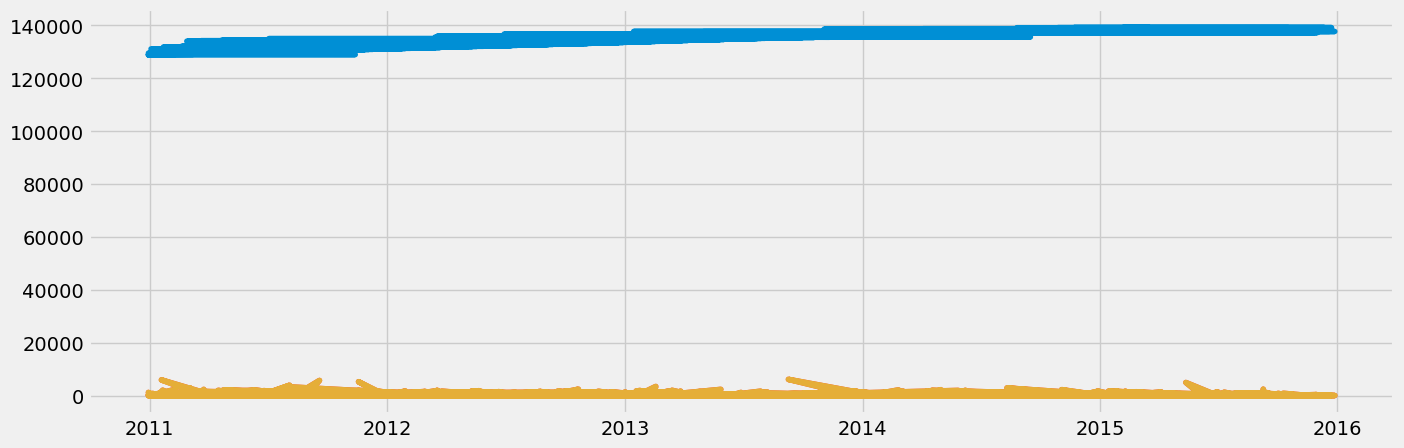

In [16]:
# plot new set

plt.figure(figsize = (15,5), dpi = 100)
plt.plot(df_sub)

# The yellow line shows the close amount, and the blue line shows claim amount. It seems over time, the claim amounts have gotten higher

In [18]:
df_sub.isnull().sum() 

index           0
Claim Amount    0
Close Amount    0
dtype: int64

In [19]:
dups = df_sub.duplicated()
dups.sum()

0

# 6. Dickey-Fuller test

In [34]:
# Claim Amount

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_sub['Claim Amount'])

Dickey-Fuller Stationarity test:
Test Statistic                   -99.839121
p-value                            0.000000
Number of Lags Used                0.000000
Number of Observations Used    10204.000000
Critical Value (1%)               -3.430991
Critical Value (5%)               -2.861823
Critical Value (10%)              -2.566921
dtype: float64


In [35]:
# Close Amount

from statsmodels.tsa.stattools import adfuller 

def dickey_fuller(timeseries):
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

dickey_fuller(df_sub['Close Amount'])

Dickey-Fuller Stationarity test:
Test Statistic                   -99.839121
p-value                            0.000000
Number of Lags Used                0.000000
Number of Observations Used    10204.000000
Critical Value (1%)               -3.430991
Critical Value (5%)               -2.861823
Critical Value (10%)              -2.566921
dtype: float64


# The test statistic in both cases is smaller than any of the critical values, so we can reject the null hypothesis.

# Therefore, the data is likely stationary.

# 9. Autocorrelations

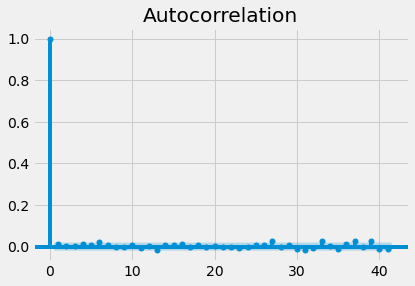

In [36]:
# Claim Amount

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_sub['Claim Amount'])
plt.show()

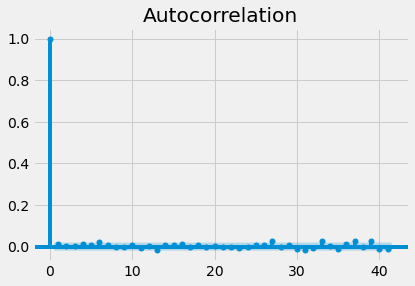

In [40]:
# Close Amount

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_sub['Close Amount'])
plt.show()